In [88]:
"""
Ten Bar Constrained Truss Problem
    - Goal is to find the optimal cross-sectional areas for each truss in a 10-bar truss (http://flowlab.groups.et.byu.net/mdobook-dark.pdf page 591 of pdf)
    - Given file to examine a truss (truss.py)
    - OBJECTIVE: minimize the mass of the structure
        - SUBJECT TO: Constraints that every segment does not yield in compression or tension
    - DESIGN VARIABLES: Cross-sectional area of each bar


"""
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from truss import truss # this is the objective function
np.set_printoptions(precision=3)

In [89]:
convergence = np.ones(10,)*0.1

# CONSTRAINTS
YIELD_STRESS = np.ones(10,)*25e3 # psi
YIELD_STRESS[8] = 75e3 # psi for member 9 only

def yield_constraint(x):
    mass, stress = truss(x)
    return YIELD_STRESS - np.abs(stress) # The difference should be positive


MIN_CROSS_SECTION = 0.1 # in^2, bound constraint
CROSS_SECTION_BOUNDS = (MIN_CROSS_SECTION, np.inf)

def f(x):
    mass, stress = truss(x)
    return mass

# CALLBACK TO DISPLAY PROGRESS
def cb(xi):
    global convergence
    convergence = np.vstack((convergence, np.array(xi)))


In [90]:
x0 = np.ones(10,)*MIN_CROSS_SECTION # Initial Guess for Cross Sectional Area of each member

_constraints = [{ 'type':'ineq', 'fun':yield_constraint }]
_bounds = tuple([CROSS_SECTION_BOUNDS for b in range(10)])

res = minimize(f, x0, constraints=_constraints, bounds=_bounds, tol=1e-6, callback=cb)

print(res)
print(convergence.shape)

     fun: 1497.6000000099593
     jac: array([36.   , 36.   , 36.   , 36.   , 36.   , 36.   , 50.912, 50.912,
       50.912, 50.912])
 message: 'Optimization terminated successfully'
    nfev: 146
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([7.9  , 0.1  , 8.1  , 3.9  , 0.1  , 0.1  , 5.798, 5.515, 3.677,
       0.141])
(14, 10)


In [91]:
mass, stress = truss(res.x)
print(f"Optimal Mass: {mass:.3f} lbs")
print(f"Optimal Cross Sections (in^2): {res.x}")

Optimal Mass: 1497.600 lbs
Optimal Cross Sections (in^2): [7.9   0.1   8.1   3.9   0.1   0.1   5.798 5.515 3.677 0.141]


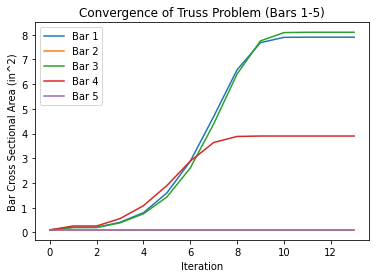

In [94]:
iters = [i for i in range(14)]

fig1 = plt.figure()
for i in range(5):
    plt.plot(iters, convergence[:,i], label=f'Bar {i+1}')

plt.xlabel("Iteration")
plt.ylabel("Bar Cross Sectional Area (in^2)")
plt.title("Convergence of Truss Problem (Bars 1-5)")
plt.legend()
plt.show()

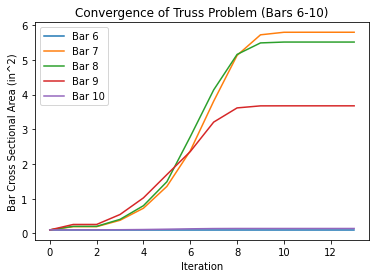

In [96]:
iters = [i for i in range(14)]

fig1 = plt.figure()
for i in range(5):
    plt.plot(iters, convergence[:,i+5], label=f'Bar {i+6}')

plt.xlabel("Iteration")
plt.ylabel("Bar Cross Sectional Area (in^2)")
plt.title("Convergence of Truss Problem (Bars 6-10)")
plt.legend()
plt.show()